<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/Sian's_PCA_1DCNN_(Unsupervised_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IoT-23 Data preprocessing
- Collection
- Cleaning
- Encoding
- Scaling
- Normalisation

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Data Collection
data_file_path = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 8GB Dataset/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled'
#Read the file
df = pd.read_csv(
    data_file_path,
    sep="\t",
    comment="#",
    header=None,
    names=[
        "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
        "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
        "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
        "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "label"
    ]
)

# #TEST:
# # List of file paths
# data_file_paths = [
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/Benign_Dataset13.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/DoS_Dataset21.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/GafgytBotnet_Dataset3.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/MiraiBotnet_Dataset1.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/MiraiVariant_Dataset5.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/OkiruBotnet_Dataset17.csv',
#     '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/IoT-23 Preprocessed Dataset/PartOfMioriBotnet_Dataset20.csv'

# ]
# dfs = []#set the df list var

# for file_path in data_file_paths: # Loop through the file paths and add the data to a temp df var
#   try:
#       temp_df = pd.read_csv(
#           file_path,
#           sep=",",
#           comment="#",
#           header=0,
#           names=[
#               "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
#               "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
#               "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
#               "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "label"
#           ]
#       )
#       dfs.append(temp_df) #add the info in the temp df to the dfs list
#       print(f"Loaded file: {file_path} with {len(temp_df)} rows")
#   except Exception as e:
#       print(f"Error reading file {file_path}: {e}")

# # Concatenate all dataframes into one
# df = pd.concat(dfs, ignore_index=True) #make the list of dataframes into one big dataframe


print("\nInitial sample:")
print(df.head().to_string())

# Step 2: Data Cleaning
# Convert timestamp to datetime
df["ts"] = pd.to_datetime(df["ts"], unit="s", errors='coerce')

# Drop non-informative or redundant columns
df.drop(columns=['uid', 'id.orig_h', 'id.resp_h', 'local_orig', 'local_resp', 'history'], inplace=True)

# Replace '-' with NaN for consistent handling
df.replace('-', np.nan, inplace=True)

# Drop rows where critical numeric fields are missing
df.dropna(subset=[
    'duration', 'orig_bytes', 'resp_bytes', 'id.orig_p', 'id.resp_p',
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'
], inplace=True)

# Convert appropriate columns to numeric types
numeric_columns = [
    'duration', 'orig_bytes', 'resp_bytes', 'id.orig_p', 'id.resp_p',
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'missed_bytes'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Encode categorical columns
categorical_columns = ['proto', 'conn_state', 'service']
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Ensure strings
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert label to binary (malicious=1, benign=0)
df['label'] = df['label'].apply(lambda x: 1 if 'Malicious' in str(x) else 0)

# Drop any rows still containing NaN
df.dropna(inplace=True)

print("\nCleaned sample:")
print(df.head().to_string())
print("\nData types and nulls:")
print(df.info())
# print("\nStatistics:")
# print(df.describe().to_string())


# --- Split features and labels ---
X = df.drop(columns=['label', 'ts']).values  # Drop label and timestamp
y = df['label'].values

# --- Normalize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Add counts of malware and benign logs ---
total_logs = len(df)
malware_logs = df['label'].sum()  # since malware=1
benign_logs = total_logs - malware_logs

print(f"\nTotal logs: {total_logs}")
print(f"Malware logs: {malware_logs}")
print(f"Benign (non-malicious) logs: {benign_logs}")



Initial sample:
             ts                 uid        id.orig_h  id.orig_p        id.resp_h  id.resp_p proto service  duration orig_bytes resp_bytes conn_state local_orig local_resp  missed_bytes history  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes                                            label
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103      51524   65.127.233.163         23   tcp       -  2.999051          0          0         S0          -          -             0       S          3            180          0              0  (empty)   Malicious   PartOfAHorizontalPortScan
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103      56305    63.150.16.171         23   tcp       -         -          -          -         S0          -          -             0       S          1             60          0              0  (empty)   Malicious   PartOfAHorizontalPortScan
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103      41101     111.40.23.49         23   tcp    

#Apply PCA

In [111]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10) #PCA will reduce the dimensionality of the data to exactly 10 features
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced {X_scaled.shape[1]} to {X_pca.shape[1]} components")
print("\nData types and shape:")
print(type(X_pca))
print(X_pca.shape)

Reduced 13 to 10 components

Data types and shape:
<class 'numpy.ndarray'>
(212448, 10)


# Data reshaping for 1D CNN input
creating x_training data that is only benign and x_test that is both malicious and benign

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

# Step 1: Reshape the data for 1D CNN input
# --- 1D CNN expects input shape: (samples, timesteps, features) ---
# Here: timesteps = number of features, features = 1 (per timestep)
X_1dcnn = X_pca.reshape((X_pca.shape[0], X_pca.shape[1], 1))

#Step 2: Train/Validation/Test Split
# Separate benign and malicious
X_benign = X_1dcnn[y == 0]
y_benign = y[y == 0]

X_malicious = X_1dcnn[y == 1]
y_malicious = y[y == 1]

# --- Split into Train/Val/Test ---
# Split benign into 80% train and valadation and 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_benign, y_benign, test_size=0.2, random_state=42, stratify=y_benign)

# Now split train_val further into train and val (e.g., 85% train, 15% val of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp)

# Prepare test set: combine 20% benign test + all the malicious data sample
# Convert to lists first
X_test_list = X_test.tolist()
X_malicious_list = X_malicious.tolist()

y_test_list = y_test.tolist()
y_malicious_list = y_malicious.tolist()

# Combine using list addition
X_test_list = X_test_list + X_malicious_list
y_test_list = y_test_list + y_malicious_list

# Convert back to float32 NumPy arrays
X_test = np.array(X_test_list, dtype=np.float32)
y_test = np.array(y_test_list, dtype=np.float32)


# Shuffle data:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# --- Final Shape Confirmation ---
print("1D CNN input shape:", X_1dcnn.shape)
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
#print(f"Labels - Train: {np.bincount(y_train)}, Val: {np.bincount(y_val)}, Test: {np.bincount(y_test)}")

1D CNN input shape: (212448, 10, 1)
Train: (15746, 10, 1), Val: (2779, 10, 1), Test: (193923, 10, 1)


#1D CNN model
Since there's no ground truth, the CNN won't learn to map inputs to labels. Instead, a proxy objective must be designed. This proxy objective will be measuring how far features are from a "normal" center (e.g., Deep SVDD).

To convert the supervised CNN pipeline into an unsupervised CNN for anomaly detection, dependency on labels during training need to be removed.

Deep SVDD-style unsupervised CNN:
*   The CNN learns to map all “normal” data (benign traffic) to a compact region in feature space.
*   Anomalies (malicious traffic) are later detected based on distance from the learned center.

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

#Step 3: Define the 1D CNN Model

# Define input shape
input_shape = (X_train.shape[1], 1)  # (timesteps, features)

# Build CNN feature extractor model
cnn_feature_extractor_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(32, activation='linear')  # Feature vector output (not classification)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Create the Custom SVDD-style Loss
Compute the distance of output features from a learned center in the feature space. Flagging anomalies as samples with high feature-space distance from center.

In [114]:
import tensorflow.keras.backend as K
#Step 4: Create Custom SVDD-style Loss

# Define a center vector (initialized randomly or as mean of features after pretraining)
center = K.variable(np.zeros((32,), dtype=np.float32), name='center')

# Custom SVDD loss
def svdd_loss(y_true, y_pred):
    return K.mean(K.sum(K.square(y_pred - center), axis=1))

#Compile model

In [115]:
# Step 5: Compile the Model
cnn_feature_extractor_model.compile(optimizer='adam', loss=svdd_loss)
cnn_feature_extractor_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 8, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 2, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,960 (50.62 KB)

 Trainable params: 12,768 (49.88 KB)

 Non-trainable params: 192 (768.00 B)

#Train Model

In [116]:
#Step 6: Train the Model
# Generate dummy labels (all zeros), same length as the input and float32 data type
dummy_y_train = np.zeros((X_train.shape[0],), dtype=np.float32)
dummy_y_val = np.zeros((X_val.shape[0],), dtype=np.float32)

print("X_train dtype:", X_train.dtype)
print("dummy_y_train dtype:", dummy_y_train.dtype)

# Train the model using dummy labels
history = cnn_feature_extractor_model.fit(
    X_train, dummy_y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, dummy_y_val),
    verbose=1
)

X_train dtype: float64
dummy_y_train dtype: float32
Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 15.2593 - val_loss: 0.0350
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1180 - val_loss: 9.8690e-04
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0293 - val_loss: 6.7002e-05
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0159 - val_loss: 1.5604e-05
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - val_loss: 5.1973e-06
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0047 - val_loss: 4.6569e-06
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - val_loss: 1.6156e-06
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0023 - val_loss: 4.2042e-06
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018 - val_loss: 1.1663e-06
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014 - val_loss: 5.4362e-07


#Anomaly Detection Phase
Get feature vectors from the trained model and compute distance to center where large distances indicates anomalies.

In [117]:
# Predict features for X_test
X_test_features = cnn_feature_extractor_model.predict(X_test) # Trained CNN model without the final classification layer; Shape of X_test_features: (num_samples, feature_dim)

# Calcualte the Euclidean distance from center
distances = np.linalg.norm(X_test_features - K.eval(center), axis=1) # Center is the mean vector of all benign embeddings from the training set

threshold = np.percentile(distances[y_test == 0], 50)# Threshold is the 95th percentile of distances from benign (label = 0) samples.

malicious_predictions = (distances > threshold).astype(int) #Samples with distances greater than the threshold are labeled 1 (malicious) and others are labeled 0 (normal/benign).



6061/6061 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


#Evaluate Detection Results


Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.02      1.00      0.05      4632
         1.0       1.00      0.03      0.06    189291

    accuracy                           0.06    193923
   macro avg       0.51      0.52      0.05    193923
weighted avg       0.98      0.06      0.06    193923



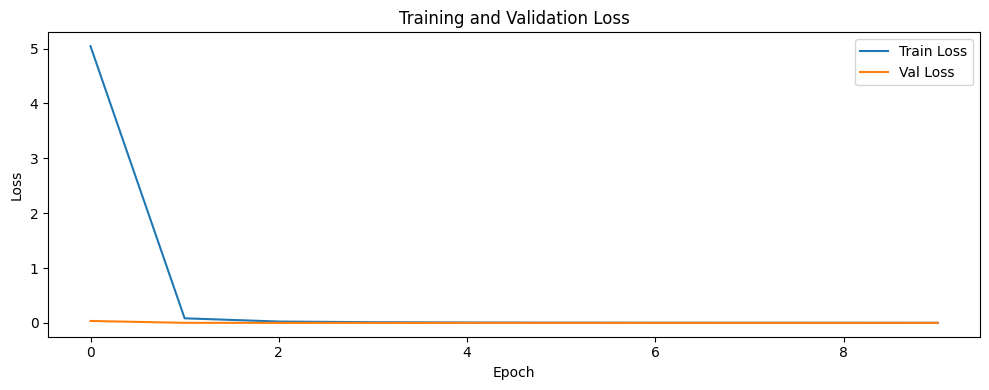

Confusion Matrix:
[[  4632      0]
 [183256   6035]]

True Negatives (Benign correctly classified): 4632
False Positives (Benign misclassified as malware): 0
False Negatives (Malware missed): 183256
True Positives (Malware correctly identified): 6035


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate predictions against ground truth
print("\nClassification Report on Test Set:")
print(classification_report(y_test, malicious_predictions))


# Plot Training Loss (no accuracy in unsupervised setting)
plt.figure(figsize=(10, 4))

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Val Loss')  # Safe in case val_loss wasn't tracked
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, malicious_predictions)

# Optional: print as table
print("Confusion Matrix:")
print(cm)

# Detailed breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (Benign correctly classified): {tn}")
print(f"False Positives (Benign misclassified as malware): {fp}")
print(f"False Negatives (Malware missed): {fn}")
print(f"True Positives (Malware correctly identified): {tp}")

